We start off by importing `pandas`, which will allow us to extract, aggregate, and analyze our data. We also need to import   `matplotlib` since we need to visualize the data as well.

The aesthetic of the visualizations are altered as well. The size of the legend, axis, ticks, and font are all altered. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', size=12) # font size 
plt.rc('axes', labelsize=14, titlesize=14) # font size of axis and label titles 
plt.rc('legend', fontsize=12) # font size of legend
plt.rc('xtick', labelsize=5) # size of ticks on x-axis
plt.rc('ytick', labelsize=10) # size of ticks on y-axis

I decided to use a dataset from Kaggle of the first 7 generations of Pokemon. This dataset shows basic information about Pokemon such as their names, weight, height, and number in the Pokedex. Additionally, it includes information that can be interesting to analyze when aggregated, such as attack, defense, hit points (HP), generation, and if they are considered legendary. Here, we are loading the csv file and converting it into a `pandas` Series so that it can be examined. 

In [2]:
data_source_raw = "../../datasets/pokemon.csv"
data_source_result = pd.read_csv(data_source_raw)

Getting specific columns that are important. 

There's a lot of information in this file, with a lot of it being unnecessary at the moment.

As a result, we're going to filter for specific columns. In this code, we've filtered for the generation and legendary column.

In [4]:
generation_legends = data_source_result[["generation", "is_legendary"]]

Afterwards, we determine how many legendary Pokemon are there for each generation.

In this example, `generation` represents a discrete variable since it exists as an integer within a fixed range of 1-7. 

We find that the generation with the most legenedary Pokemon is generation 7. This is done by running the `groupby()` function on the `generation` column then subsequently running `agg` to find the number of legendary pokemon.

In [15]:

legendary_per_generation = generation_legends.groupby("generation").agg({"is_legendary":"sum", "generation":"first"})
print(legendary_per_generation)

            is_legendary  generation
generation                          
1                      5           1
2                      6           2
3                     10           3
4                     13           4
5                     13           5
6                      6           6
7                     17           7


Getting the data, we can now visualize it on a bar graph to compare the number of legendary pokemon across generation

(-1.0, 7.0, 0.0, 25.0)

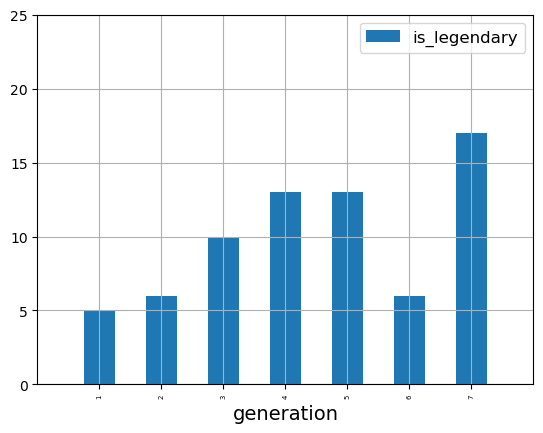

In [17]:
legendary_per_generation.plot(kind="bar", grid=True, x="generation", y="is_legendary")
plt.axis([-1,7 , 0, 25])
plt.ann